In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
import shapefile as shp

import folium
import numpy as np
import descartes
from shapely.geometry import Point

In [8]:
df= pd.read_csv("sss.csv")

df.at[2,'ST_NM']= "Arunanchal Pradesh"
df

,ST_NM,Number of Flood Events
0,Andaman & Nicobar Island,0
1,Andhra Pradesh,139
2,Arunanchal Pradesh,0
3,Assam,0
4,Bihar,0
5,Chandigarh,0
6,Chhattisgarh,113
7,Dadara & Nagar Havelli,0
8,Daman & Diu,0
9,Goa,0


In [9]:
df1 = gpd.read_file("/home/civil/mtech/cew192199/India_shape/India-States.shp")
type(df1)

geopandas.geodataframe.GeoDataFrame

In [10]:
merged = pd.merge(df,df1, how="outer")



In [11]:
merged = GeoDataFrame(merged,crs =4326)
type(merged)
merged



,ST_NM,Number of Flood Events,geometry
0,Andaman & Nicobar Island,0,"MULTIPOLYGON (((93.84861 7.24051, 93.84273 7.2..."
1,Andhra Pradesh,139,"MULTIPOLYGON (((81.39375 16.33380, 81.32692 16..."
2,Arunanchal Pradesh,0,"POLYGON ((95.23730 26.67984, 95.23339 26.69068..."
3,Assam,0,"POLYGON ((95.19587 27.03716, 95.15483 27.00028..."
4,Bihar,0,"MULTIPOLYGON (((84.50720 24.26323, 84.49672 24..."
5,Chandigarh,0,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
6,Chhattisgarh,113,"POLYGON ((83.94652 23.62299, 83.95595 23.62465..."
7,Dadara & Nagar Havelli,0,"POLYGON ((73.20657 20.12216, 73.20935 20.09766..."
8,Daman & Diu,0,"MULTIPOLYGON (((72.80198 20.37417, 72.81503 20..."
9,Goa,0,"POLYGON ((74.11877 15.65246, 74.13560 15.64929..."


No handles with labels found to put in legend.


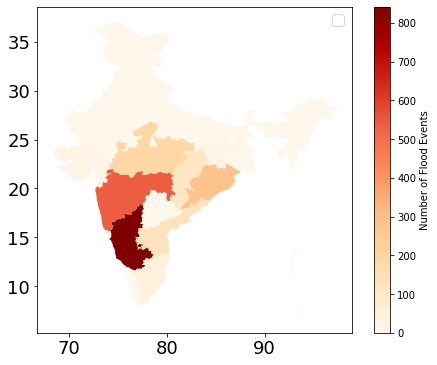

In [12]:
chara = merged.plot(column ="Number of Flood Events", cmap = "OrRd", legend= True, legend_kwds={'label':"Number of Flood Events"},figsize=(8,6))
chara.xaxis.set_tick_params(labelsize=18)
chara.yaxis.set_tick_params(labelsize=18)
chara.legend(fontsize=15)
plt.savefig("Floodevents1.png")